# ID5030 Assignment - 4

### Logistic Regression and Multiclass Classification    
By: P Akhil Reddy    
Roll No. CH20B076

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Question 1 - a: logistic regression for the OR gate

##### Creating the custom dataset for OR gate

In [2]:
# First column is for representing the bias term
X_or = np.array([[1, 0, 0],
             [1, 1, 0],
             [1, 0, 1],
             [1, 1, 1]])

y_or = np.array([[0], [1], [1], [1]])

In [3]:
def sigmoid(x):
    # Sigmoid function
    return 1/(1 + np.exp(-x))

def predict(X, weights, predict_class=True):
    # Predicts the class based on given weights and inputs
    Z = X@weights
    sig = sigmoid(Z)

    if predict_class:
        # Here the prediction will be 1 if the score given by the model is above 0.5 else it will be 0
        pred = np.where(sig > 0.5, 1, 0)

        return pred
    
    return sig

def cost_function(y, y_hat):
    # Loss function for logistic regression
    return -np.mean(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat))

Training the logistic regression model on the OR gate's truth table

In [4]:
# Initialising the weights to zero
w_or = np.full((3, 1), 0)

num_epochs = 20000

# Learning rate and number of data points
lr = 1e-2
m = 4

# Array of epochs and losses
epochs = list(range(0, 20000, 1000))
losses = []

# Loop which calculates the losses and iteratively updates the weights
for epoch in range(num_epochs):
    pred = sigmoid(X_or@w_or)

    loss = cost_function(y_or, pred)

    w_or = w_or - (lr/m)*(X_or.T)@(pred - y_or)

    if epoch%1000 == 0:
        losses.append(loss)
        # print(f'loss at epoch {epoch}: {loss}')

In [5]:
# Final updated weights
w_or

array([[-2.183045  ],
       [ 5.35944023],
       [ 5.35944023]])

Plotting losses vs epoch number

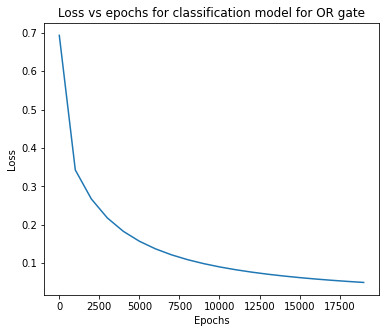

In [6]:
# Plotting losses vs epoch number
with mpl.rc_context({'figure.figsize': (6, 5), 'font.size': 10}):
    plt.figure()

    plt.plot(epochs, losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs epochs for classification model for OR gate')

#### Verifying whether the model has really replicated the OR gate

In [7]:
# Predicting the outputs of the OR gate
predict(X_or, w_or, predict_class=True)

array([[0],
       [1],
       [1],
       [1]])

#### It is observed that the model has replicated the OR gate well.

##### Commenting on the converged values for the weights:

##### It is observed that the datapoints of different classes are linearly separable. Using weights corresponding to only linear features, it is possible to accurately classify the output as 0 or 1. Also it should be noted that the weights corresponding to the both input variables are equal, which means that slope of the straight line separating the classes is -1.

### Question 1-b: Implementing logistic regression for AND and XOR gates

#### First the AND gate will be modelled

In [8]:
# Creating custom dataset for AND gate

# First column is for representing the bias term
X_and = np.array([[1, 0, 0],
             [1, 1, 0],
             [1, 0, 1],
             [1, 1, 1]])

y_and = np.array([[0], [0], [0], [1]])

# Initialising weights
w_and = np.full((3, 1), 0)

num_epochs = 20000

lr = 1e-2
m = 4

epochs = list(range(0, 20000, 1000))
losses = []

# Running the loop to calculate losses and update the weights
for epoch in range(num_epochs):
    pred = sigmoid(X_and@w_and)

    loss = cost_function(y_and, pred)

    w_and = w_and - (lr/m)*(X_and.T)@(pred - y_and)

    if epoch%1000 == 0:
        losses.append(loss)
        # print(f'loss at epoch {epoch}: {loss}')

In [9]:
# Final values of weights
w_and

array([[-6.54715961],
       [ 4.23678837],
       [ 4.23678837]])

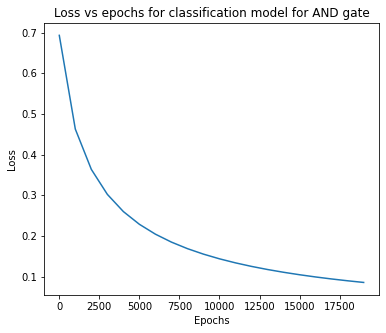

In [10]:
# Plotting the losses vs epoch number for AND gate training
with mpl.rc_context({'figure.figsize': (6, 5), 'font.size': 10}):
    plt.figure()

    plt.plot(epochs, losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs epochs for classification model for AND gate')

#### Verifying whether the model has really replicated the AND gate

In [11]:
# Predicting the outputs of AND gate
predict(X_and, w_and, predict_class=True)

array([[0],
       [0],
       [0],
       [1]])

#### Thus it is observed that the model replicates the AND gate very well.

##### Commenting on the converged values for the weights:

##### It is observed that the datapoints of different classes are linearly separable. Using weights corresponding to only linear features, it is possible to accurately classify the output as 0 or 1. Here also, weights corresponding to the both featues are equal, so the straight line separating the classes is of slope -1.

#### Now, the XOR gate will be modelled

In [12]:
# Creating custom dataset for AND gate

# First column is for representing the bias term
X_xor = np.array([[1, 0, 0],
             [1, 1, 0],
             [1, 0, 1],
             [1, 1, 1]])

y_xor = np.array([[0], [1], [1], [0]])

# initialising the weights with the value 0.1
w_xor = np.full((3, 1), 0.1)

num_epochs = 200000

lr = 1e-2
m = 4

epochs = list(range(0, 200000, 10000))
losses = []

for epoch in range(num_epochs):
    pred = sigmoid(X_xor@w_xor)

    loss = cost_function(y_xor, pred)

    w_xor = w_xor - (lr/m)*(X_xor.T)@(pred - y_xor)

    if epoch%10000 == 0:
        losses.append(loss)
        # print(f'loss at epoch {epoch}: {loss}')

In [13]:
# Final values of weights for XOR gate model
w_xor

array([[-3.32971424e-16],
       [ 2.49583340e-16],
       [ 2.49696305e-16]])

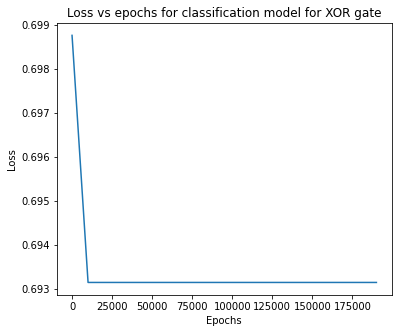

In [14]:
# Plotting the losses vs epoch number
with mpl.rc_context({'figure.figsize': (6, 5), 'font.size': 10}):
    plt.figure()

    plt.plot(epochs, losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs epochs for classification model for XOR gate')

### Verifying whether the model has replicated the XOR gate properly

In [15]:
# Predicting the outputs for the XOR gate
predict(X_xor, w_xor, predict_class=True)

array([[0],
       [0],
       [0],
       [0]])

### Commenting on the converged values for the weights:

##### Weights obtained are very small (close to zero), and also it is classifying every datapoint as zero. The datapoints of different classes are not linearly separable. A straight line cannot separate the datapoints corresponding to classes 1 and 0. Therefore the logistic regression which uses only linear features is not able to replicate the XOR gate properly.

# Question 2 - a: Logistic regression for IRIS dataset

#### Note: The dataset is loaded from the iris.data file downloaded from the website.

In [16]:
iris_df = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


One-Hot encoding the target column

In [17]:
y = pd.get_dummies(iris_df['class'])

# Keeping the categorical labels in class_true as it will be used for making confusion matrix
class_true = iris_df['class']

iris_df.drop(columns='class', axis=1, inplace=True)
iris_df = iris_df.join(y)

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


Separating the target columns and the training data

In [18]:
# Taking the inputs and target columns
X = iris_df.drop(columns=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], axis=1).values
y = iris_df[['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']].values

# Adding a column of ones in the training data, to represent the bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Splitting the train and test datasets
X_train, X_test, y_train, y_test, class_true_train, class_true_test = train_test_split(X, y, class_true, test_size=0.3, random_state=42)

In [19]:
def softmax(z):
    # Softmax function
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

def cost_function_multiclass(y_true, y_pred):
    # Cost function for multiclass logistic regression
    return -np.mean(y_true*np.log(y_pred))

def predict_multiclass(X, weights):
    # Predicts the class using given weights
    pred = softmax(X@weights)

    return np.argmax(pred, axis=1)

In [20]:
def train(X, y_true):
    # Trains a multiclass logistic regression model and returns the final weights and losses array
    w = np.full((5, 3), 0)

    num_epochs = 20000

    lr = 1e-2
    m = 4

    epochs = list(range(0, 20000, 1000))
    losses = []

    for epoch in range(num_epochs):
        pred = softmax(X@w)

        loss = cost_function_multiclass(y_true, pred)

        w = w - (lr/m)*(X.T)@(pred - y_true)

        if epoch%1000 == 0:
            losses.append(loss)
            # print(f'loss at epoch {epoch}: {loss}')

    return w, losses

Training the multiclass logistic regression model on iris dataset

In [21]:
epochs = list(range(0, 20000, 1000))

weights_multiclass, losses = train(X_train, y_train)

# Final weights obtained after training
weights_multiclass

array([[ 1.04339377,  6.44514581, -7.48853958],
       [ 2.29742622,  0.19670894, -2.49413516],
       [ 4.95391856,  0.59206236, -5.54598092],
       [-6.7789118 ,  0.33347621,  6.4454356 ],
       [-3.35396433, -3.7547831 ,  7.10874743]])

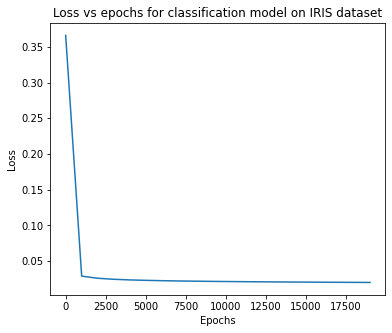

In [22]:
# Plotting the loss vs epoch number for the training on iris dataset
with mpl.rc_context({'figure.figsize': (6, 5), 'font.size': 10}):
    plt.figure()

    plt.plot(epochs, losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs epochs for classification model on IRIS dataset')

# Question 2 - b: Reporting the confusion matrix

### In the assignment it was given that the model must be trained on the entire iris dataset.  

### However, if all of the given data is used for training, then there will be no test dataset for computing the confusion matrix. It is sensible to avoid using the train dataset for confusion matrix and instead do a 70-30 train-test split.

### So, here it is assumed that we should report the confusion matrix for the test dataset after splitting.

In [23]:
# Predicting the classes for the test dataset using the trained model
class_pred_test = predict_multiclass(X_test, weights_multiclass)

In [24]:
# Taking the predicted classes and the correct class labels and merging into a pandas dataframe
y_table = pd.DataFrame(class_true_test)
y_table['class_pred'] = class_pred_test.tolist()

# Changing numeric labels to categorical labels
y_table['class_pred'].replace({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}, inplace=True)

Creating the confusion matrix using pd.crosstab function

In [25]:
classes = np.unique(y_table[['class', 'class_pred']].values)
conf_mat = pd.crosstab(y_table['class'], y_table['class_pred'], rownames=['class'], colnames=['class_pred'])

# Setting the index and column tabs and filling the missing values with 0
conf_mat = conf_mat.reindex(index=classes, columns=classes, fill_value=0)

In [26]:
conf_mat

class_pred,Iris-setosa,Iris-versicolor,Iris-virginica
class,,,
Iris-setosa,19,0,0
Iris-versicolor,0,13,0
Iris-virginica,0,0,13


Plotting the confusion matrix

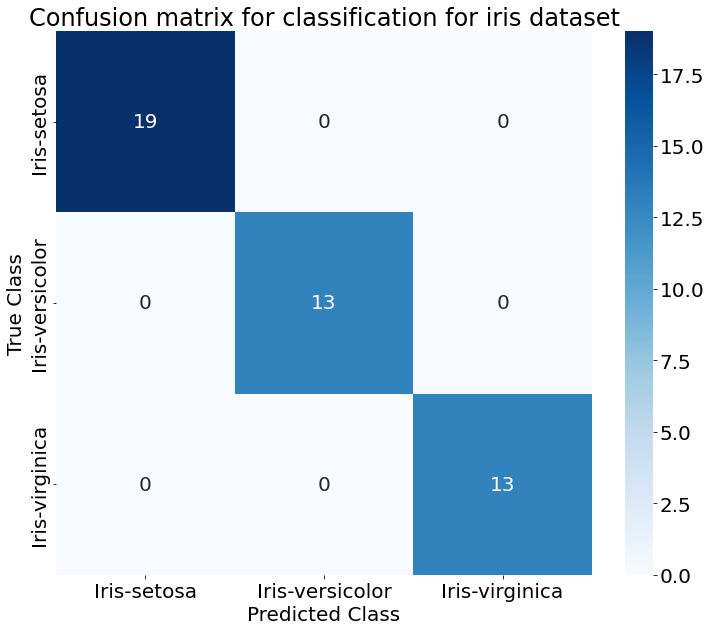

In [27]:
# Plotting the confusion matrix
with mpl.rc_context({'figure.figsize': (12, 10), 'font.size': 20}):
    plt.figure()
    sns.heatmap(conf_mat, annot=True, cmap='Blues')

    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion matrix for classification for iris dataset')

### It is observed that the model scores 100% accuracy on the test dataset. There is no mis-classification by the model on the test dataset.